**Apuntes útiles pandas**<br>
- https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python#question3
- https://stackoverflow.com/questions/15943769/how-do-i-get-the-row-count-of-a-pandas-dataframe
- https://chrisalbon.com/python/data_wrangling/pandas_dropping_column_and_rows/

Se ha establecido un dataframe con la siguiente estructura

|generación|Puerta#1 x| Puerta#1 y|Puerta#2 x| Puerta#2 y|Puerta#3 x| Puerta#3 y|Puerta#4 x| Puerta#4 y|Puerta#5 x| Puerta#5 y|
|-|-|-|-|-|-|-|-|-|-|-|
|..|..|..|..|..|..|..|..|..|..|..|

Donde cada fila corresponderá a un individuo

In [1]:
# https://pynetlogo.readthedocs.io/en/latest/_docs/pynetlogo.html
# https://pynetlogo.readthedocs.io/en/latest/example1.html
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
import platform
import pyNetLogo
import random
import numpy as np
gui=True #ejecutar netlogo con interfaz grafica (True = si, False = no)
current_gen = 0 #contador de la generación actual
max_gen=50 #total de generaciones
n_puertas = 5 #numero de puertas a ubicar
pop_size=20 #tamaño poblacion
iteraciones=5
selection_tournament=3 #cantidad de individuos por torneo
prob_mutacion=0.3 #probabilidad de mutacion


print("inicializando, espere...")
try:
    sistema=platform.system()
    if(sistema=='Windows'):
        netlogo = pyNetLogo.NetLogoLink(gui=True)
    elif(sistema=='Linux'):
        netlogo = pyNetLogo.NetLogoLink(gui=gui,netlogo_home='NetLogo 6.0.4/')
    else:
        netlogo = pyNetLogo.NetLogoLink(gui=gui)
    print("Listo!")
except:
    print("Ocurrio un problema al levantar netlogo!")



inicializando, espere...
Listo!


In [23]:
# df=pd.DataFrame(columns=['gen','x1','y1','x2','y2','x3','y3','x4','y4','x5','y5']) #dataframe que representará a los individuos existentes
# ww=netlogo.report("world-width") #obtener el número de columnas de la grilla
# wh=netlogo.report("world-height") #obtener el número de filas de la grilla
# plan_file = "conference.plan" #archivo plano 
# world=list() #representación del mundo en una lista multidimensional (filasXcolumnas)

# wall_val=64 #valor de muralla
# inner_val=0 #valor espacio interno edificio
# outer_Val=2 #valor espacio externo edificio
# door_val=45 #valor para las puertas


In [2]:
# #abrir el archivo de plano para inicializar la representación de listas multidimensionales
# with open(plan_file) as file:
#     row=list()
#     counter=0
#     for i in file:
#         patch=i.replace('\n','').split(' ')
#         if(counter%ww !=0):
#             row.append(int(patch[2]))
#         else:
#             row=list()
#             world.append(row)
#         counter = counter + 1
        
#cargar el programa en netlogo
netlogo.load_model(r'escape4_v6.nlogo')
#cargar el plano en netlogo
netlogo.command('set plan-data "office.plan"')
netlogo.command("load-plan-file")

In [12]:
#simulate recibe la lista ordenada de coordenadas de puertas, realiza la simulación correspondiente y retorna los ticks que ha demorado
#La distribución de puertas debe estar previamente validada, en caso de que las puertas no sean accesibles, la simulación podría quedar atascada en un while infinito
def simulate(doors):
    netlogo.command("set door-data [ [{0} {1}] [{2} {3}] [{4} {5}] [{6} {7}] [{8} {9}] ]".format(*doors))
    netlogo.command("show-plan")
    netlogo.command("generate-population")
    while(netlogo.report("count turtles")>0):
        netlogo.command("go")
    return(netlogo.report("ticks"))

#reinicia el dataframe y crea la primera generación, recibe la cantidad de individuos a generar
def genesis(n):
    global df
    df=pd.DataFrame(columns=['gen','x1','y1','x2','y2','x3','y3','x4','y4','x5','y5']) #dataframe que representará a los individuos existentes
    for i in range(n):
        doors_loc=pick_random_doors(5)
        df.loc[df.shape[0]]=[current_gen] + doors_loc
        
def catch_the_good_doors(): #Obtener las coordenadas x e y de todas las puertas(posibles) que nos sirven
    x=netlogo.report("listax")
    y=netlogo.report("listay")
    arr=[]
    for i in range(len(x)):
        arr.append([x[i],y[i]])
    return arr

def simulate_ind(arr_indexes,gen):
    return(simulate([gen[arr_indexes[0]][0],gen[arr_indexes[0]][1],gen[arr_indexes[1]][0],gen[arr_indexes[1]][1],gen[arr_indexes[2]][0],gen[arr_indexes[2]][1],gen[arr_indexes[3]][0],gen[arr_indexes[3]][1],gen[arr_indexes[4]][0],gen[arr_indexes[4]][1]]))

In [11]:
tuplas=catch_the_good_doors() #gen
len(tuplas)

298

In [121]:
largo=len(tuplas)
# tuplas
print(largo)

298


# Creación Generación 0

In [122]:
indice_Puertas=[]
for i in range(pop_size):
    indice_puertas_Individuo=[]
    for x in range(5):
        indice_puertas_Individuo.append(random.randint(0,largo-1))
    indice_Puertas.append(indice_puertas_Individuo)
#     print(puertasIndividuo)
#   simulate(puertasIndividuo)

In [123]:
# coord_puertas_Gen0
indice_Puertas

[[196, 28, 281, 211, 293],
 [195, 121, 160, 178, 285],
 [145, 33, 288, 178, 59],
 [271, 58, 38, 53, 126],
 [103, 258, 277, 253, 30],
 [135, 194, 105, 161, 93],
 [91, 266, 163, 205, 19],
 [150, 291, 128, 289, 247],
 [38, 196, 273, 36, 162],
 [50, 107, 293, 119, 41],
 [76, 271, 132, 32, 105],
 [97, 1, 24, 139, 29],
 [277, 114, 208, 214, 111],
 [154, 267, 168, 197, 165],
 [4, 277, 172, 277, 288],
 [197, 71, 137, 169, 201],
 [15, 158, 255, 104, 252],
 [270, 289, 32, 121, 251],
 [228, 119, 83, 120, 118],
 [51, 285, 63, 226, 210]]

# Evaluación

In [258]:
# import time
ticks=[]
#t0=time.time()
for i in range(len(indice_Puertas)):
    auxTicks=[]
    for itera in range(iteraciones):
        auxTicks.append(simulate_ind(indice_Puertas[i],tuplas))
    #print(sum(auxTicks)/float(iteraciones))
    ticks.append(np.mean(auxTicks))
# ticks
total_Fitness=np.sum(ticks)
media_Fitness=np.mean(ticks)
print(total_Fitness,media_Fitness)
# print("%s  Segundos "%(time.time()-t0))

2189.2 109.46


# Selección

In [ ]:
# auxiliar=[]
# for i in range(len(thaBest)):
#     for j in range(5):
#         auxiliar.append(thaBest[i][j])

# for i in (selection_tournament):
#     x=[]
#     for j in range(5):
#         x.append(a[random.randint(0,len(auxiliar)-1)])
    

In [259]:
##
#ticks
poblacion=[]
for pop in range (pop_size):
    thaBest=[]
    bestTicks=[]
    for i in range (selection_tournament):
        azar=random.randint(0,pop_size-1)
        aux1=ticks[azar]
        bestTicks.append(int(aux1))
        aux2=indice_Puertas[azar]
        thaBest.append(aux2)
    mejor_ticks=np.amin(bestTicks)
    index=bestTicks.index(mejor_ticks)
    #print(index)
    poblacion.append(thaBest[index])
    #print(mejor_ticks)
    #print(thaBest)
poblacion

[[154, 267, 168, 197, 165],
 [145, 267, 168, 214, 19],
 [15, 158, 168, 214, 19],
 [197, 33, 38, 197, 165],
 [270, 33, 38, 197, 165],
 [271, 33, 38, 197, 165],
 [91, 267, 168, 205, 165],
 [97, 1, 24, 139, 29],
 [270, 33, 38, 197, 165],
 [195, 285, 208, 214, 19],
 [195, 285, 208, 214, 19],
 [270, 33, 38, 197, 165],
 [277, 267, 168, 205, 165],
 [91, 267, 168, 205, 165],
 [270, 33, 38, 197, 165],
 [271, 33, 38, 197, 165],
 [270, 33, 38, 197, 165],
 [38, 267, 168, 205, 165],
 [91, 267, 168, 205, 165],
 [270, 33, 38, 197, 165]]

In [260]:
temp=poblacion
punto_corte= random.randint(1,4) 
print(temp[12])
print(temp[12][:punto_corte])
print(temp[12][punto_corte:])

[277, 267, 168, 205, 165]
[277, 267]
[168, 205, 165]


# Recombinación

In [261]:
#Se mezcla el material genetico para crear nuevos individuos
for i in range(int(pop_size/2)):
    punto_corte = random.randint(1,4) #Se elige un punto para hacer el intercambio
    padre1=poblacion[i] #Se eligen dos padres
    padre2=poblacion[(int(pop_size/2))+i]

    poblacion[i][:punto_corte] = padre1[:punto_corte] #Se mezcla el material genetico de los padres en cada nuevo individuo
    poblacion[int(pop_size/2)+i][punto_corte:] = padre2[punto_corte:]
poblacion

[[154, 267, 168, 197, 165],
 [145, 267, 168, 214, 19],
 [15, 158, 168, 214, 19],
 [197, 33, 38, 197, 165],
 [270, 33, 38, 197, 165],
 [271, 33, 38, 197, 165],
 [91, 267, 168, 205, 165],
 [97, 1, 24, 139, 29],
 [270, 33, 38, 197, 165],
 [195, 285, 208, 214, 19],
 [195, 285, 208, 214, 19],
 [270, 33, 38, 197, 165],
 [277, 267, 168, 205, 165],
 [91, 267, 168, 205, 165],
 [270, 33, 38, 197, 165],
 [271, 33, 38, 197, 165],
 [270, 33, 38, 197, 165],
 [38, 267, 168, 205, 165],
 [91, 267, 168, 205, 165],
 [270, 33, 38, 197, 165]]

# Mutación

In [234]:
#####CORREGIR######
for individuo in indice_Puertas:
    if(random.random()<=prob_mutacion):
        pos=random.randint(0,4)
        nuevaPuerta=random.randint(0,largo-1)
        while(indice_Puertas[individuo][pos]==nuevaPuerta):
            nuevaPuerta=random.randint(0,largo-1)
        indice_Puertas[individuo][pos]=nuevaPuerta
#terminar mutación, corregir posibles errores

228

In [ ]:
###despues de tooooodo este webeo tendriamos la gen 1 lista para evaluar y asi sucesivamente

TypeError: list indices must be integers or slices, not str

In [10]:
pop=[{'doors': [168, 58, 260, 193, 276], 'gen': 5, 'ticks': 85.4},
 {'doors': [37, 230, 85, 193, 276], 'gen': 5, 'ticks': 88.0},
 {'doors': [277, 112, 82, 39, 186], 'gen': 5, 'ticks': 96.4},
 {'doors': [253, 128, 210, 172, 61], 'gen': 5, 'ticks': 91.6},
 {'doors': [276, 67, 95, 45, 55], 'gen': 5, 'ticks': 129.4},
 {'doors': [248, 58, 130, 39, 186], 'gen': 5, 'ticks': 104.2},
 {'doors': [168, 58, 260, 45, 260], 'gen': 0, 'ticks': 87.8},
 {'doors': [37, 230, 85, 202, 136], 'gen': 0, 'ticks': 83.4},
 {'doors': [277, 112, 82, 200, 61], 'gen': 4, 'ticks': 84.0},
 {'doors': [253, 128, 210, 78, 156], 'gen': 0, 'ticks': 92.0},
 {'doors': [276, 67, 95, 238, 251], 'gen': 0, 'ticks': 103.2},
 {'doors': [248, 50, 130, 200, 23], 'gen': 3, 'ticks': 90.2},
 {'doors': [253, 128, 210, 193, 276], 'gen': 3, 'ticks': 94.0},
 {'doors': [277, 67, 82, 193, 276], 'gen': 0, 'ticks': 91.0},
 {'doors': [260, 204, 17, 39, 186], 'gen': 1, 'ticks': 102.2},
 {'doors': [125, 277, 5, 172, 61], 'gen': 0, 'ticks': 100.6},
 {'doors': [248, 58, 130, 45, 55], 'gen': 4, 'ticks': 78.2},
 {'doors': [125, 277, 45, 39, 186], 'gen': 3, 'ticks': 95.2},
 {'doors': [253, 67, 95, 202, 136], 'gen': 4, 'ticks': 95.6},
 {'doors': [37, 128, 210, 200, 23], 'gen': 4, 'ticks': 102.6},
 {'doors': [277, 112, 82, 200, 61], 'gen': 4, 'ticks': 84.0},
 {'doors': [248, 58, 130, 45, 55], 'gen': 4, 'ticks': 78.2},
 {'doors': [202, 16, 75, 133, 162], 'gen': 4, 'ticks': 113.2},
 {'doors': [253, 67, 95, 238, 251], 'gen': 1, 'ticks': 98.2},
 {'doors': [37, 128, 210, 78, 179], 'gen': 2, 'ticks': 84.2},
 {'doors': [277, 67, 82, 193, 276], 'gen': 0, 'ticks': 91.0},
 {'doors': [248, 58, 130, 45, 260], 'gen': 1, 'ticks': 90.8},
 {'doors': [202, 16, 75, 125, 94], 'gen': 0, 'ticks': 91.6},
 {'doors': [37, 230, 85, 202, 136], 'gen': 0, 'ticks': 83.4},
 {'doors': [248, 50, 130, 200, 23], 'gen': 3, 'ticks': 90.2},
 {'doors': [125, 277, 5, 172, 61], 'gen': 0, 'ticks': 100.6},
 {'doors': [168, 58, 260, 45, 260], 'gen': 0, 'ticks': 87.8},
 {'doors': [66, 239, 272, 106, 162], 'gen': 0, 'ticks': 113.0},
 {'doors': [164, 250, 69, 296, 155], 'gen': 0, 'ticks': 122.6},
 {'doors': [125, 277, 45, 39, 186], 'gen': 3, 'ticks': 95.2},
 {'doors': [37, 230, 85, 78, 76], 'gen': 3, 'ticks': 107.2},
 {'doors': [248, 50, 130, 200, 23], 'gen': 3, 'ticks': 90.2},
 {'doors': [253, 128, 210, 193, 276], 'gen': 3, 'ticks': 94.0},
 {'doors': [125, 277, 5, 172, 61], 'gen': 0, 'ticks': 100.6},
 {'doors': [37, 230, 85, 202, 136], 'gen': 0, 'ticks': 83.4},
 {'doors': [248, 58, 130, 45, 260], 'gen': 1, 'ticks': 90.8},
 {'doors': [253, 128, 210, 78, 156], 'gen': 0, 'ticks': 92.0},
 {'doors': [288, 204, 17, 39, 186], 'gen': 0, 'ticks': 95.6},
 {'doors': [37, 128, 210, 78, 179], 'gen': 2, 'ticks': 84.2},
 {'doors': [37, 277, 5, 200, 23], 'gen': 2, 'ticks': 118.8},
 {'doors': [240, 112, 82, 193, 276], 'gen': 2, 'ticks': 107.4},
 {'doors': [168, 58, 260, 45, 260], 'gen': 0, 'ticks': 87.8},
 {'doors': [37, 128, 210, 78, 179], 'gen': 2, 'ticks': 84.2},
 {'doors': [37, 277, 5, 200, 23], 'gen': 2, 'ticks': 118.8},
 {'doors': [37, 173, 70, 224, 79], 'gen': 2, 'ticks': 194.2},
 {'doors': [240, 112, 82, 193, 276], 'gen': 2, 'ticks': 107.4},
 {'doors': [248, 58, 130, 45, 260], 'gen': 1, 'ticks': 90.8},
 {'doors': [37, 230, 85, 202, 136], 'gen': 0, 'ticks': 83.4},
 {'doors': [37, 287, 95, 69, 176], 'gen': 0, 'ticks': 115.6},
 {'doors': [240, 164, 294, 97, 47], 'gen': 0, 'ticks': 120.0},
 {'doors': [253, 128, 210, 78, 156], 'gen': 0, 'ticks': 92.0},
 {'doors': [125, 277, 5, 172, 61], 'gen': 0, 'ticks': 100.6},
 {'doors': [97, 173, 70, 224, 145], 'gen': 0, 'ticks': 119.8},
 {'doors': [277, 67, 82, 193, 276], 'gen': 0, 'ticks': 91.0},
 {'doors': [248, 58, 130, 45, 260], 'gen': 1, 'ticks': 90.8},
 {'doors': [253, 67, 95, 238, 251], 'gen': 1, 'ticks': 98.2},
 {'doors': [260, 204, 17, 39, 186], 'gen': 1, 'ticks': 102.2},
 {'doors': [37, 230, 85, 202, 136], 'gen': 0, 'ticks': 83.4},
 {'doors': [253, 128, 210, 78, 156], 'gen': 0, 'ticks': 92.0},
 {'doors': [23, 102, 148, 194, 226], 'gen': 0, 'ticks': 118.2},
 {'doors': [168, 58, 260, 45, 260], 'gen': 0, 'ticks': 87.8},
 {'doors': [276, 67, 95, 238, 251], 'gen': 0, 'ticks': 103.2},
 {'doors': [288, 204, 17, 39, 186], 'gen': 0, 'ticks': 95.6},
 {'doors': [276, 178, 97, 217, 68], 'gen': 0, 'ticks': 114.2},
 {'doors': [168, 58, 260, 45, 260], 'gen': 0, 'ticks': 87.8},
 {'doors': [240, 164, 294, 97, 47], 'gen': 0, 'ticks': 120.0},
 {'doors': [275, 95, 286, 176, 204], 'gen': 0, 'ticks': 154.8},
 {'doors': [178, 58, 186, 106, 143], 'gen': 0, 'ticks': 143.0},
 {'doors': [97, 173, 70, 224, 145], 'gen': 0, 'ticks': 119.8},
 {'doors': [276, 178, 97, 217, 68], 'gen': 0, 'ticks': 114.2},
 {'doors': [37, 287, 95, 69, 176], 'gen': 0, 'ticks': 115.6},
 {'doors': [13, 83, 120, 263, 57], 'gen': 0, 'ticks': 160.2},
 {'doors': [66, 239, 272, 106, 162], 'gen': 0, 'ticks': 113.0},
 {'doors': [277, 67, 82, 193, 276], 'gen': 0, 'ticks': 91.0},
 {'doors': [106, 256, 36, 134, 99], 'gen': 0, 'ticks': 123.2},
 {'doors': [37, 230, 85, 202, 136], 'gen': 0, 'ticks': 83.4},
 {'doors': [202, 16, 75, 125, 94], 'gen': 0, 'ticks': 91.6},
 {'doors': [276, 67, 95, 238, 251], 'gen': 0, 'ticks': 103.2},
 {'doors': [164, 250, 69, 296, 155], 'gen': 0, 'ticks': 122.6},
 {'doors': [187, 161, 240, 201, 213], 'gen': 0, 'ticks': 155.0},
 {'doors': [23, 102, 148, 194, 226], 'gen': 0, 'ticks': 118.2},
 {'doors': [125, 277, 5, 172, 61], 'gen': 0, 'ticks': 100.6},
 {'doors': [253, 128, 210, 78, 156], 'gen': 0, 'ticks': 92.0},
 {'doors': [288, 204, 17, 39, 186], 'gen': 0, 'ticks': 95.6}]

In [1]:
pop2=[
 {'doors': [37, 230, 85, 202, 136], 'gen': 0, 'ticks': 83.4},
 {'doors': [253, 128, 210, 78, 156], 'gen': 0, 'ticks': 92.0},
 {'doors': [23, 102, 148, 194, 226], 'gen': 0, 'ticks': 118.2},
 {'doors': [168, 58, 260, 45, 260], 'gen': 0, 'ticks': 87.8},
 {'doors': [276, 67, 95, 238, 251], 'gen': 0, 'ticks': 103.2},
 {'doors': [288, 204, 17, 39, 186], 'gen': 0, 'ticks': 95.6},
 {'doors': [276, 178, 97, 217, 68], 'gen': 0, 'ticks': 114.2},
 {'doors': [168, 58, 260, 45, 260], 'gen': 0, 'ticks': 87.8},
 {'doors': [240, 164, 294, 97, 47], 'gen': 0, 'ticks': 120.0},
 {'doors': [275, 95, 286, 176, 204], 'gen': 0, 'ticks': 154.8},
 {'doors': [178, 58, 186, 106, 143], 'gen': 0, 'ticks': 143.0},
 {'doors': [97, 173, 70, 224, 145], 'gen': 0, 'ticks': 119.8},
 {'doors': [276, 178, 97, 217, 68], 'gen': 0, 'ticks': 114.2},
 {'doors': [37, 287, 95, 69, 176], 'gen': 0, 'ticks': 115.6},
 {'doors': [13, 83, 120, 263, 57], 'gen': 0, 'ticks': 160.2},
 {'doors': [66, 239, 272, 106, 162], 'gen': 0, 'ticks': 113.0},
 {'doors': [277, 67, 82, 193, 276], 'gen': 0, 'ticks': 91.0},
 {'doors': [106, 256, 36, 134, 99], 'gen': 0, 'ticks': 123.2},
 {'doors': [37, 230, 85, 202, 136], 'gen': 0, 'ticks': 83.4},
 {'doors': [202, 16, 75, 125, 94], 'gen': 0, 'ticks': 91.6},
 {'doors': [276, 67, 95, 238, 251], 'gen': 0, 'ticks': 103.2},
 {'doors': [164, 250, 69, 296, 155], 'gen': 0, 'ticks': 122.6},
 {'doors': [187, 161, 240, 201, 213], 'gen': 0, 'ticks': 155.0},
 {'doors': [23, 102, 148, 194, 226], 'gen': 0, 'ticks': 118.2},
 {'doors': [125, 277, 5, 172, 61], 'gen': 0, 'ticks': 100.6},
 {'doors': [253, 128, 210, 78, 156], 'gen': 0, 'ticks': 92.0},
 {'doors': [288, 204, 17, 39, 186], 'gen': 0, 'ticks': 95.6}]
len(pop2)

27

In [2]:
import numpy as np
def do_tournament(pop,n_players):
    result = []
    tmp_pop = pop.copy()
    if(n_players > len(pop)):
        n_players=len(pop)
    for i in range(len(tmp_pop)):
        players_selection = []
        for j in range (n_players):
            selection = np.random.choice(tmp_pop)
            players_selection.append(selection)
        winner = players_selection[np.argmin([ i['ticks'] for i in players_selection])]
        result.append(winner)    
    return result

In [3]:
winner=do_tournament(pop2,3)
winner

[{'doors': [37, 230, 85, 202, 136], 'gen': 0, 'ticks': 83.4},
 {'doors': [288, 204, 17, 39, 186], 'gen': 0, 'ticks': 95.6},
 {'doors': [125, 277, 5, 172, 61], 'gen': 0, 'ticks': 100.6},
 {'doors': [37, 287, 95, 69, 176], 'gen': 0, 'ticks': 115.6},
 {'doors': [168, 58, 260, 45, 260], 'gen': 0, 'ticks': 87.8},
 {'doors': [253, 128, 210, 78, 156], 'gen': 0, 'ticks': 92.0},
 {'doors': [253, 128, 210, 78, 156], 'gen': 0, 'ticks': 92.0},
 {'doors': [168, 58, 260, 45, 260], 'gen': 0, 'ticks': 87.8},
 {'doors': [253, 128, 210, 78, 156], 'gen': 0, 'ticks': 92.0},
 {'doors': [276, 178, 97, 217, 68], 'gen': 0, 'ticks': 114.2},
 {'doors': [168, 58, 260, 45, 260], 'gen': 0, 'ticks': 87.8},
 {'doors': [288, 204, 17, 39, 186], 'gen': 0, 'ticks': 95.6},
 {'doors': [37, 230, 85, 202, 136], 'gen': 0, 'ticks': 83.4},
 {'doors': [23, 102, 148, 194, 226], 'gen': 0, 'ticks': 118.2},
 {'doors': [277, 67, 82, 193, 276], 'gen': 0, 'ticks': 91.0},
 {'doors': [37, 230, 85, 202, 136], 'gen': 0, 'ticks': 83.4},
 {

In [173]:
import random
n_doors=5
def do_crossover(pop,gen_number):
    new_pop = pop.copy()
    cross_pop=[]
    indexes=[]
    for individual in range (len(new_pop)):
        if (np.random.random() <= 0.3):
#             temp=new_pop.pop(individual)
            indexes.append(individual)
            cross_pop.append(new_pop[individual])
    if(len(cross_pop)%2==1):
        r=random.randint(0,len(cross_pop)-1)
        cross_pop.pop(r)
        indexes.pop(r)

    for i in range (int(len(cross_pop)/2)):
        punto_corte = random.randint(1,n_doors - 1)
        parent1=cross_pop[i]['doors']
        parent2=cross_pop[int(len(cross_pop)/2 + i)]['doors']
        new_individual_1 = {
            'doors':parent1[:punto_corte] + parent2[punto_corte:],
            'gen':gen_number,
            'ticks':0
        }
        new_individual_2={
            'doors':parent1[punto_corte:]+parent2[:punto_corte],
            'gen':gen_number,
            'ticks':0
        }
        cross_pop[i]=new_individual_1
        cross_pop[int(len(cross_pop)/2) + i]=new_individual_2
        for i in range(len(indexes)):
            new_pop[indexes[i]]=cross_pop[i]
        
    result=new_pop
    return result
        


In [174]:
do_crossover(winner,1)

[{'doors': [288, 204, 17, 39, 68], 'gen': 1, 'ticks': 0}, {'doors': [168, 58, 260, 45, 260], 'gen': 1, 'ticks': 0}, {'doors': [186, 276, 178, 97, 217], 'gen': 1, 'ticks': 0}, {'doors': [260, 168, 58, 260, 45], 'gen': 1, 'ticks': 0}]


[{'doors': [37, 230, 85, 202, 136], 'gen': 0, 'ticks': 83.4},
 {'doors': [288, 204, 17, 39, 68], 'gen': 1, 'ticks': 0},
 {'doors': [125, 277, 5, 172, 61], 'gen': 0, 'ticks': 100.6},
 {'doors': [37, 287, 95, 69, 176], 'gen': 0, 'ticks': 115.6},
 {'doors': [168, 58, 260, 45, 260], 'gen': 1, 'ticks': 0},
 {'doors': [253, 128, 210, 78, 156], 'gen': 0, 'ticks': 92.0},
 {'doors': [253, 128, 210, 78, 156], 'gen': 0, 'ticks': 92.0},
 {'doors': [168, 58, 260, 45, 260], 'gen': 0, 'ticks': 87.8},
 {'doors': [253, 128, 210, 78, 156], 'gen': 0, 'ticks': 92.0},
 {'doors': [186, 276, 178, 97, 217], 'gen': 1, 'ticks': 0},
 {'doors': [168, 58, 260, 45, 260], 'gen': 0, 'ticks': 87.8},
 {'doors': [288, 204, 17, 39, 186], 'gen': 0, 'ticks': 95.6},
 {'doors': [37, 230, 85, 202, 136], 'gen': 0, 'ticks': 83.4},
 {'doors': [23, 102, 148, 194, 226], 'gen': 0, 'ticks': 118.2},
 {'doors': [277, 67, 82, 193, 276], 'gen': 0, 'ticks': 91.0},
 {'doors': [37, 230, 85, 202, 136], 'gen': 0, 'ticks': 83.4},
 {'doors': [

In [8]:
pop2

[{'doors': [37, 230, 85, 202, 136], 'gen': 0, 'ticks': 83.4},
 {'doors': [253, 128, 210, 78, 156], 'gen': 0, 'ticks': 92.0},
 {'doors': [23, 102, 148, 194, 226], 'gen': 0, 'ticks': 118.2},
 {'doors': [168, 58, 260, 45, 260], 'gen': 0, 'ticks': 87.8},
 {'doors': [276, 67, 95, 238, 251], 'gen': 0, 'ticks': 103.2},
 {'doors': [288, 204, 17, 39, 186], 'gen': 0, 'ticks': 95.6},
 {'doors': [276, 178, 97, 217, 68], 'gen': 0, 'ticks': 114.2},
 {'doors': [168, 58, 260, 45, 260], 'gen': 0, 'ticks': 87.8},
 {'doors': [240, 164, 294, 97, 47], 'gen': 0, 'ticks': 120.0},
 {'doors': [275, 95, 286, 176, 204], 'gen': 0, 'ticks': 154.8},
 {'doors': [178, 58, 186, 106, 143], 'gen': 0, 'ticks': 143.0},
 {'doors': [97, 173, 70, 224, 145], 'gen': 0, 'ticks': 119.8},
 {'doors': [276, 178, 97, 217, 68], 'gen': 0, 'ticks': 114.2},
 {'doors': [37, 287, 95, 69, 176], 'gen': 0, 'ticks': 115.6},
 {'doors': [13, 83, 120, 263, 57], 'gen': 0, 'ticks': 160.2},
 {'doors': [66, 239, 272, 106, 162], 'gen': 0, 'ticks': 11

[(0, 83.4), (1, 92.0), (2, 118.2), (3, 87.8), (4, 103.2), (5, 95.6), (6, 114.2), (7, 87.8), (8, 120.0), (9, 154.8), (10, 143.0), (11, 119.8), (12, 114.2), (13, 115.6), (14, 160.2), (15, 113.0), (16, 91.0), (17, 123.2), (18, 83.4), (19, 91.6), (20, 103.2), (21, 122.6), (22, 155.0), (23, 118.2), (24, 100.6), (25, 92.0), (26, 95.6)]
62.04074074074074


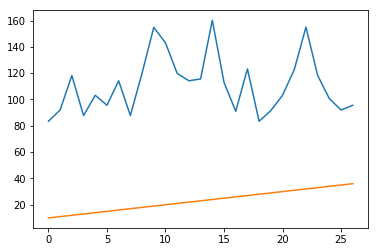

In [24]:

import numpy as np
all_mean=[]
extra=[]
for i in range(len(pop2)):
    all_mean.append((i,pop2[i]['ticks']))
    extra.append((all_mean[i][0] + 10))
# print(x/len(pop2))
print(all_mean)
print(np.mean(all_mean[][1]))

import matplotlib.pyplot as plt
x_points=list(map(lambda x:x[0],all_mean))
y_points=list(map(lambda x:x[1],all_mean))
z_p=extra
# print("Best door combination:\n{0}\nticks:{1}".format(best_doors,best_of_all_time['ticks']))

plt.plot(x_points,y_points,z_p)
plt.show()

In [13]:
netlogo.kill_workspace()